# Linearização

Ajuste linearizado de curvas ou retas que não geram um sistema linear

#### Importar as biblioteas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import plot
import numpy as np
import matplotlib.pyplot as plt

import adjust
import sistemas_lineares.linsys as linsys

## Ajuste Linearizado

**Exemplo:** Fazer o ajuste da função $y=Ae^{Bx}$ para $P_1 = (x_1,y_1), P_2 = (x_2,y_2), \cdots, P_n = (x_n,y_n)$.

As equações seriam:

$P_1 : y_1 = A \cdot e^{Bx_1}$

$P_2 : y_2 = A \cdot e^{Bx_2}$

$\vdots$

$P_n : y_n = A \cdot e^{Bx_n}$

Essas equações não configuram um sistema de equações lineares algébricas (S.E.L.A.).

Para isso, precisamos transformar a equação:

$\ln [y = A \cdot e^{Bx}]$

$\ln y = \ln (A \cdot e^{Bx})$

Pela propriedade dos logarítmos:

$ln y = \ln A + \ln e^{Bx}$

$$\underbrace{\ln y}_{Y} = \underbrace{\ln A}_{a_0} + Bx$$

**Nota : a partir do passo acima, a solução torna-se não ótima (sub-ótima)}**

A partir desta definição, temos:

$Y = \ln y$

$a_0 = \ln A \implies A = e^{a_0}$

Assim, o sistema resultante é:

$$
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}
\cdot
\begin{pmatrix}
a_0 \\
B
\end{pmatrix}
=
\begin{pmatrix}
Y_1 \\
Y_2 \\
Y_3 \\
\vdots \\
Y_n
\end{pmatrix}
$$

Esse sistema é linear, porém também é sobredeterminado, usa-se as equações normais de um ajuste convencional a partir deste ponto.

#### Definir o conjunto de pontos

[[ 4.81746242]
 [-0.40235948]]


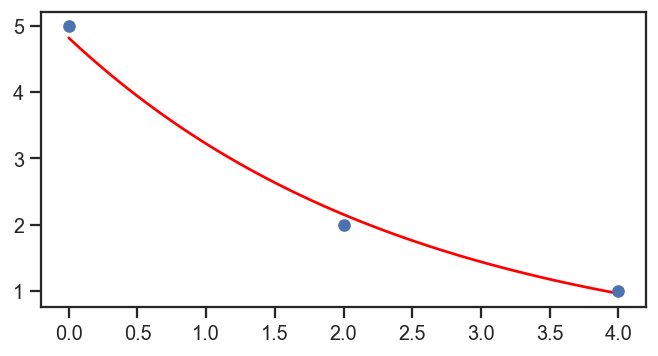

In [2]:
P = [[0, 5],
     [2, 2],
     [4, 1]]

A = np.array([[x**i for i in range(2)] for x,_ in P])
B = np.array([[np.log(y)] for _,y in P])

coef_adj = adjust.solve_normal_eq(A,B)
coef_adj[0] = np.e**coef_adj[0] # Ajustar para A

print(coef_adj)

f = lambda x : coef_adj[0]*np.e**(coef_adj[1]*x)
xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
plt.plot(xarr, f(xarr), 'red', label="Função Ajustada")
for x,y in P : plt.plot(x, y, 'bo')
plt.show()